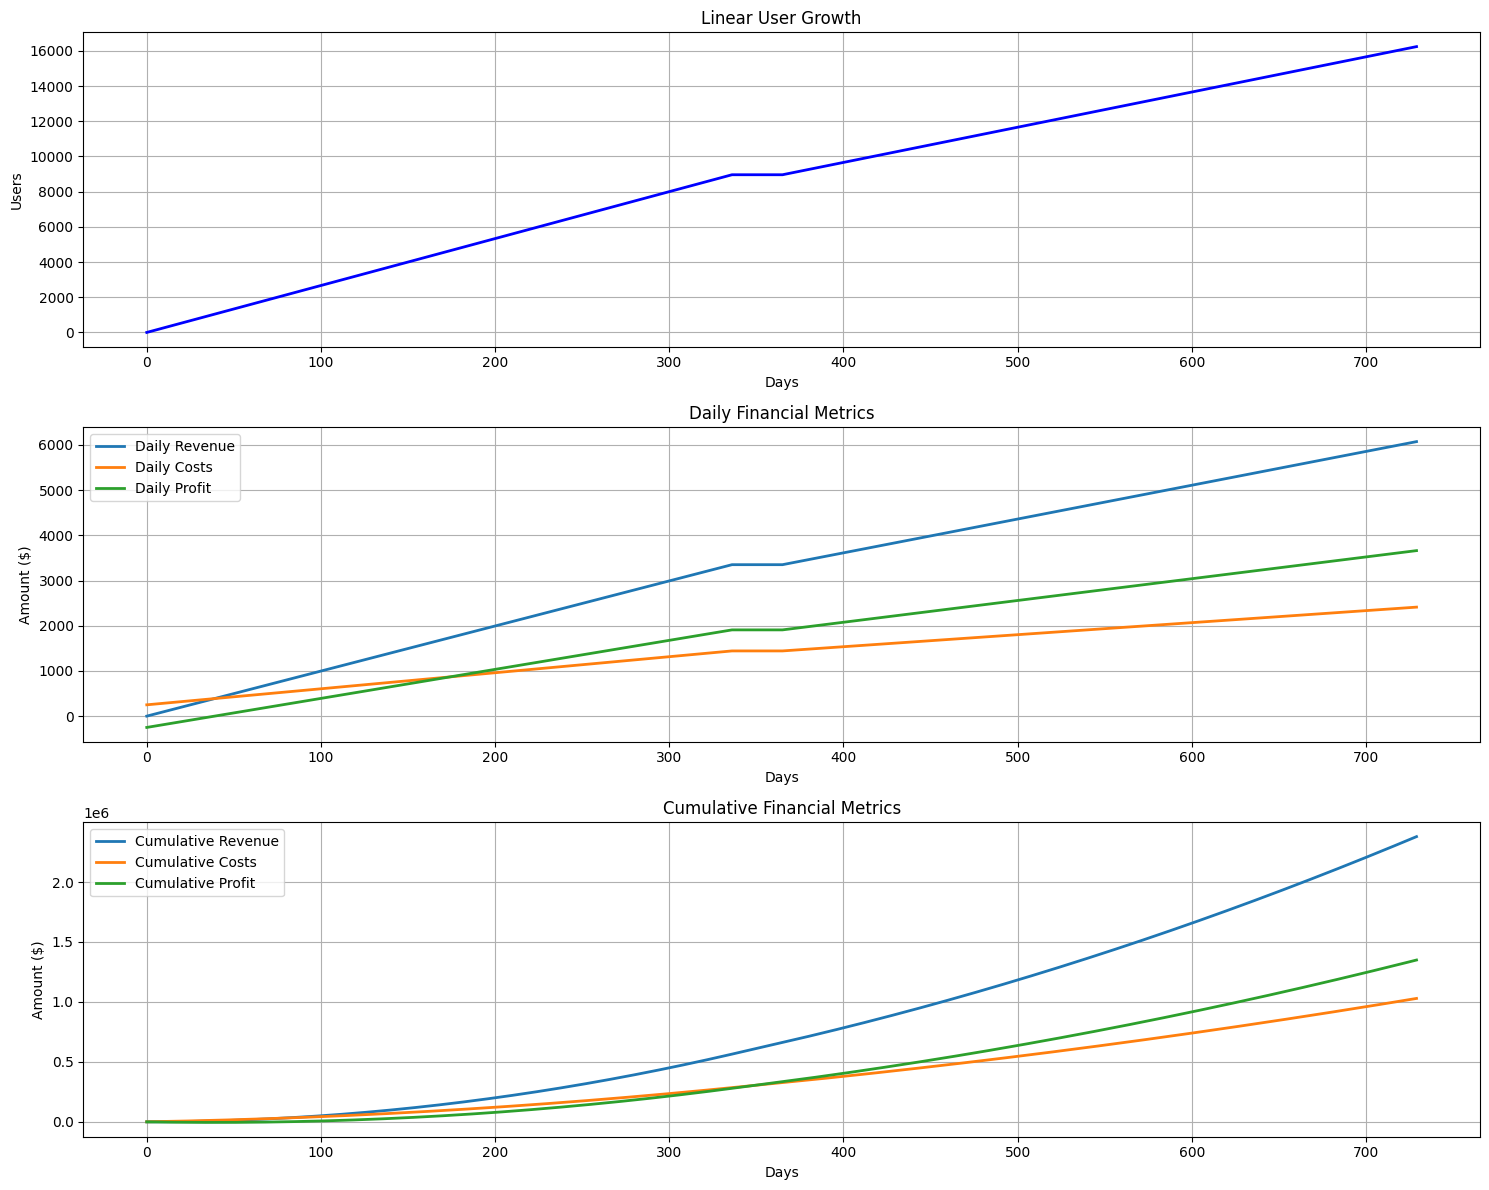

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants from spreadsheet
DAYS = 730  # 2 years
INITIAL_USERS = 0
NEW_USERS_Y1_DAILY = 800 / 30  # 700 new users per month distributed daily
NEW_USERS_Y2_DAILY = 600 / 30   # 500 new users per month distributed daily
MAX_USERS_Y1 = 8960
MAX_USERS_Y2 = 16360

# Financial constants
ORDERS_PER_USER_PER_MONTH = 0.75
ORDERS_PER_USER_PER_DAY = ORDERS_PER_USER_PER_MONTH / 30
ITEMS_PER_ORDER = 2.7
REVENUE_PER_ITEM = 4.80
DELIVERY_FEE = 2.00
COST_PER_ITEM = 1.50
PACKAGING_COST = 0.90
CREDIT_CARD_FEE_RATE = 0.025

# Labor costs
HOURLY_WAGE = 13.00
HOURS_PER_DAY = 27
EMPLOYEES_PER_MONTH = 8
MONTHLY_INSURANCE = 140
UNEMPLOYMENT_COST_PER_EMP = 420
MONTHLY_RENT = 3300

def calculate_users(day):
    if day <= 365:  # Year 1
        return min(day * NEW_USERS_Y1_DAILY, MAX_USERS_Y1)
    else:  # Year 2
        y2_days = day - 365
        return min(MAX_USERS_Y1 + (y2_days * NEW_USERS_Y2_DAILY), MAX_USERS_Y2)

def calculate_daily_financials(users):
    daily_orders = users * ORDERS_PER_USER_PER_DAY
    items_sold = daily_orders * ITEMS_PER_ORDER

    revenue_from_items = items_sold * REVENUE_PER_ITEM
    delivery_revenue = daily_orders * DELIVERY_FEE
    total_revenue = revenue_from_items + delivery_revenue

    cogs = items_sold * COST_PER_ITEM
    packaging = daily_orders * PACKAGING_COST
    credit_card_fees = total_revenue * CREDIT_CARD_FEE_RATE
    daily_labor = HOURLY_WAGE * HOURS_PER_DAY * EMPLOYEES_PER_MONTH / 30
    daily_insurance = (MONTHLY_INSURANCE * EMPLOYEES_PER_MONTH) / 30
    daily_unemployment = (UNEMPLOYMENT_COST_PER_EMP * EMPLOYEES_PER_MONTH) / 365
    daily_rent = MONTHLY_RENT / 30

    total_costs = cogs + packaging + credit_card_fees + daily_labor + daily_insurance + daily_unemployment + daily_rent
    profit = total_revenue - total_costs

    return total_revenue, profit, total_costs

# Initialize arrays
days = np.arange(DAYS)
users = np.array([calculate_users(day) for day in days])
revenues = np.zeros(DAYS)
profits = np.zeros(DAYS)
costs = np.zeros(DAYS)

# Calculate daily financials
for day in days:
    revenues[day], profits[day], costs[day] = calculate_daily_financials(users[day])

# Create visualization
plt.figure(figsize=(15, 12))

# Plot 1: User Growth
plt.subplot(3, 1, 1)
plt.plot(days, users, 'b-', linewidth=2)
plt.title('Linear User Growth')
plt.xlabel('Days')
plt.ylabel('Users')
plt.grid(True)

# Plot 2: Daily Metrics
plt.subplot(3, 1, 2)
plt.plot(days, revenues, label='Daily Revenue', linewidth=2)
plt.plot(days, costs, label='Daily Costs', linewidth=2)
plt.plot(days, profits, label='Daily Profit', linewidth=2)
plt.title('Daily Financial Metrics')
plt.xlabel('Days')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True)

# Plot 3: Cumulative Metrics
plt.subplot(3, 1, 3)
plt.plot(days, np.cumsum(revenues), label='Cumulative Revenue', linewidth=2)
plt.plot(days, np.cumsum(costs), label='Cumulative Costs', linewidth=2)
plt.plot(days, np.cumsum(profits), label='Cumulative Profit', linewidth=2)
plt.title('Cumulative Financial Metrics')
plt.xlabel('Days')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()